In [29]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ,assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from math import pi

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-04-23 06:32:24,256: Credentials are already in use. The existing account in the session will be replaced.


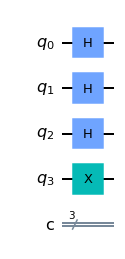

In [30]:
'''T-Gate adds a phase of pi/4 to the quantum state |1>'''

qpe = QuantumCircuit(4,3)
qpe.x(3)
qpe.h(range(3))
qpe.draw()


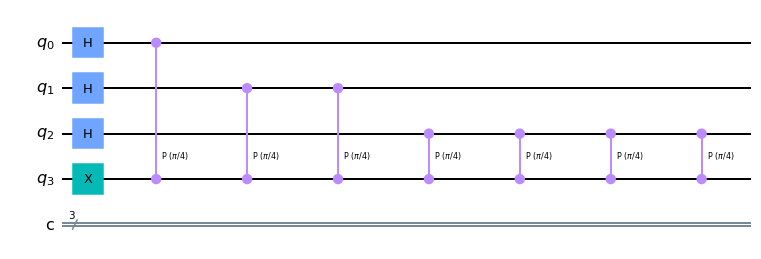

In [31]:
#applying sequence of controlled phase-gates
#counting qubits = q0,q1,q2,q3
rep = 1

for cq in range(3):
    for i in range(rep):
        qpe.cp(pi/4,cq,3)
    rep*=2
qpe.draw()
    

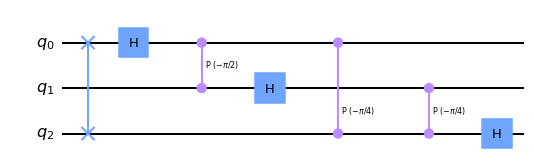

In [32]:
#drawing
inverse_QFT = QuantumCircuit(3)
inverse_QFT.swap(0,2)

inverse_QFT.h(0)
inverse_QFT.cp(-pi/2,0,1) #apply CPhase gate with control qubit-0 and target -1\
inverse_QFT.h(1)
inverse_QFT.cp(-pi/4,0,2) #apply CPhase gate with control qubit-0 and target -2\
inverse_QFT.cp(-pi/4,1,2) #apply CPhase gate with control qubit-0 and target -2\
inverse_QFT.h(2)
inverse_QFT.draw()


In [33]:
def inv_qft(qc,n): #n-qubit QFTd dagger the first n qubits in circ
    for i in range(n//2):
        qc.swap(i,n-1)
        
    for j in range(n):
        for k in range(j):
            qc.cp(-pi/(2**(j-k)),k,j)
        qc.h(j)
    
    
    

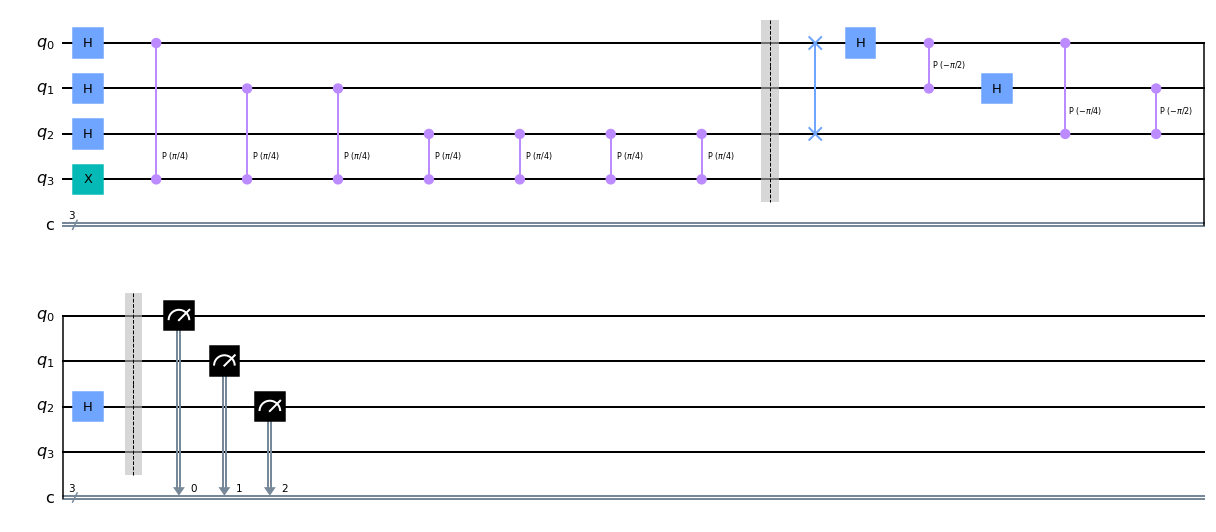

In [34]:
qpe.barrier()
inv_qft(qpe,3)
qpe.barrier()
qpe.measure(range(3),range(3))
qpe.draw()

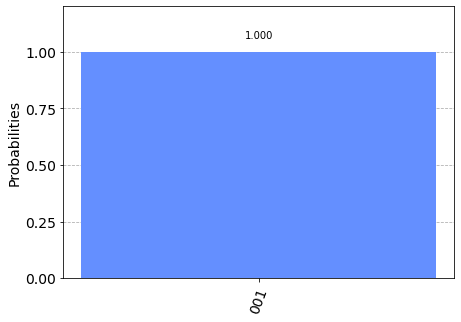

In [36]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
t_qpe = transpile(qpe,qasm_sim)
results = qasm_sim.run(assemble(t_qpe,shots = shots)).result()
ans = results.get_counts()

plot_histogram(ans)

#001 is the binary representation of 1, 2^3 theta = 1 which means theta =1/8